# Customer Churn Analysis - Jupyter Notebook

## I. Introduction

The dataset we are experimenting with was found [here](https://www.kaggle.com/blastchar/telco-customer-churn). To gain insight on what we are working with, I've copied and pasted the bulk of the description from the link:

> **Context**
>
> "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." \[IBM Sample Data > Sets\]
>
> **Content**
>
> Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
>
> The data set includes information about:
>
> * Customers who left within the last month – the column is called Churn
> * Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> * Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> * Demographic info about customers – gender, age range, and if they have partners and dependents


The link above doesn't tell us much about the where the data is gathered from, but based on the description of the variables/columns, we can assume that this data is from a telecommuncations company similar to that of Verizon or Comcast.

*Description of columns will be shown in the next section*

As stated in the **Content** section, "Churn" refers to whether or not the customer left the company within the last month or stayed with the company. This will be our response variable.

We're going to investigate this problem using **Random Forest**, **Decision Tree Classifiers**, and **Support Vector Machine** to see what information we can find. We can also use these methods to raise new questions and strategies for customer retention.

#### Libraries we'll use:

* More libraries will be imported later in the project. Here below is what we need to get started.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## II. Load the Dataset

Let's get started by getting this dataset loaded into our notebook for a short glimpse of the data.

In [2]:
data = pd.read_csv('./data/TelcoCustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Before we go any further, I will share a description of each column as described on the dataset's [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) page. 

**customerID** Customer ID

**gender** Whether the customer is a male or a female

**SeniorCitizen** Whether the customer is a senior citizen or not (1, 0)

**Partner** Whether the customer has a partner or not (Yes, No)

**Dependents** Whether the customer has dependents or not (Yes, No)

**tenure** Number of months the customer has stayed with the company

**PhoneService** Whether the customer has a phone service or not (Yes, No)

**MultipleLines** Whether the customer has multiple lines or not (Yes, No, No phone service)

**InternetService** Customer’s internet service provider (DSL, Fiber optic, No)

**OnlineSecurity** Whether the customer has online security or not (Yes, No, No internet service)

**OnlineBackup** Whether the customer has online backup or not (Yes, No, No internet service)

**DeviceProtection** Whether the customer has device protection or not (Yes, No, No internet service)

**TechSupport** Whether the customer has tech support or not (Yes, No, No internet service)

**StreamingTV** Whether the customer has streaming TV or not (Yes, No, No internet service)

**StreamingMovies** Whether the customer has streaming movies or not (Yes, No, No internet service)

**Contract** The contract term of the customer (Month-to-month, One year, Two year)

**PaperlessBilling** Whether the customer has paperless billing or not (Yes, No)

**PaymentMethod** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** The amount charged to the customer monthly

**TotalCharges** The total amount charged to the customer

**Churn** Whether the customer churned or not (Yes or No)

## III. Exploratory Data Analysis (EDA) & Data Manipulation

First, lets view the size of this dataset, find out of anything is missing from it, and if we have any duplicate entries.

In [3]:
print('We have %d rows of data with %d columns.\n' % (data.shape[0], data.shape[1]))
dups = data[data.duplicated()]
print("Number of duplicate rows: %d\n" % len(dups))
print(data.isnull().sum())

We have 7043 rows of data with 21 columns.

Number of duplicate rows: 0

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


The zeros indicate no missing data!

Next, we'll display some plots for the various columns to get a good understanding of how the data is distributed.

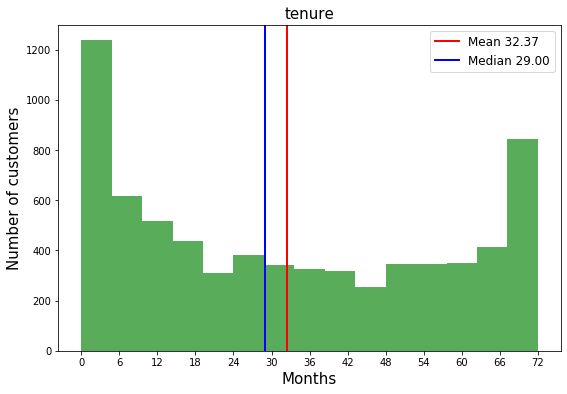

In [4]:
plt.figure(figsize = (9,6))
ten_mean = np.mean(data['tenure'])
ten_med = np.median(data['tenure'])
_ = plt.hist(data["tenure"], bins = 15, alpha = 0.65, color = 'green')
_ = plt.title("tenure", fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Months", fontsize = 15)
_ = plt.xticks(np.arange(0, 75, step=6))
_ = plt.axvline(ten_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % ten_mean)
_ = plt.axvline(ten_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % ten_med)
_ = plt.legend(fontsize = 12)

In [5]:
print("Percentage of customers who left before 6 months? : %.2f%%" % ((len(data[data['tenure'] < 6])) / len(data['tenure']) * 100))

Percentage of customers who left before 6 months? : 19.47%


Wow, that is A LOT of people leaving in their first 5 months with the company, and then something happens around the 6 year mark that is also causing people to leave. Let's focus on those people leaving in the first 5 months and see if they are breaking contract or leaving their Month-to-month plans.

In [6]:
under_6 = data[data['tenure'] < 6]

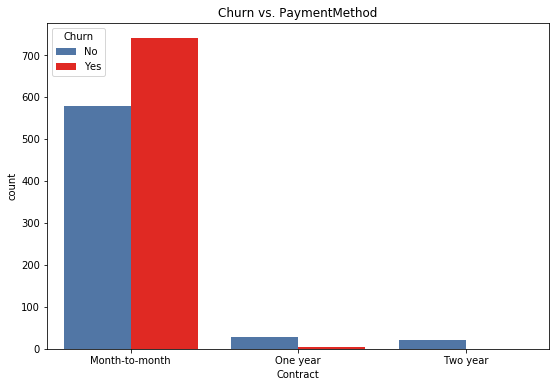

In [7]:
col_scheme = ["#4374B3", "#FF0B04" ]
sns.set_palette(sns.color_palette(col_scheme))
plt.figure(figsize=(9,6))
sns.countplot('Contract', hue='Churn', data=under_6).set_title('Churn vs. PaymentMethod')

plt.show()

The good news here is that there aren't that many customers who become so disgruntled that they decide to break contract. The amount of Month-to-month customers leaving before 6 months is still alarming though.

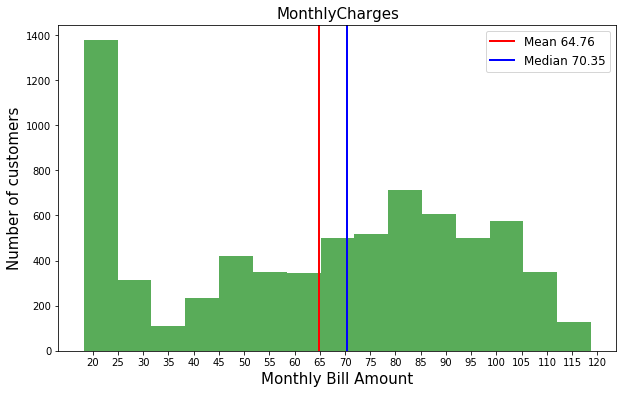

In [8]:
plt.figure(figsize = (10,6))
mc_mean = np.mean(data['MonthlyCharges'])
mc_med = np.median(data['MonthlyCharges'])
_ = plt.hist(data["MonthlyCharges"], bins = 15, alpha = 0.65, color = 'green')
_ = plt.xticks(np.arange(20, 125, step=5))
_ = plt.title("MonthlyCharges", fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Monthly Bill Amount", fontsize = 15)
_ = plt.axvline(mc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % mc_mean)
_ = plt.axvline(mc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % mc_med)
_ = plt.legend(fontsize = 12)

In [9]:
print("Percentage of customers with a MonthlyBill of $25 or less? : %.2f%%" % ((len(data[data['MonthlyCharges'] < 25.01])) / len(data['MonthlyCharges']) * 100))

Percentage of customers with a MonthlyBill of $25 or less? : 19.96%


For some odd reason, we run into an small issue here where **TotalCharges** is being read as a string variable. We'll coerce it to a float so we can proceed with our histogram.

In [10]:
# Convert data in 'TotalCharges' from string to float.
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [11]:
print("How many missing values in 'TotalCharges' after coercion? : %d" % data['TotalCharges'].isnull().sum())
print("What percentage of the data are these missing values? : %0.2f%%" % ((data['TotalCharges'].isnull().sum()) / (len(data['TotalCharges'])) * 100))

How many missing values in 'TotalCharges' after coercion? : 11
What percentage of the data are these missing values? : 0.16%


After coercion of **TotalCharges** from string to float, we see that we actaully do have some missing values. It is safe to assume that these values are simply missing at random, so we’ll just remove these observations considering they only account for **0.16%** of the data.

In [12]:
data2 = data[data["TotalCharges"].notnull()] # Keep rows for which 'TotalCharges' has recorded data
data2 = data2.reset_index()[data2.columns] # Reset the index of the dataframe

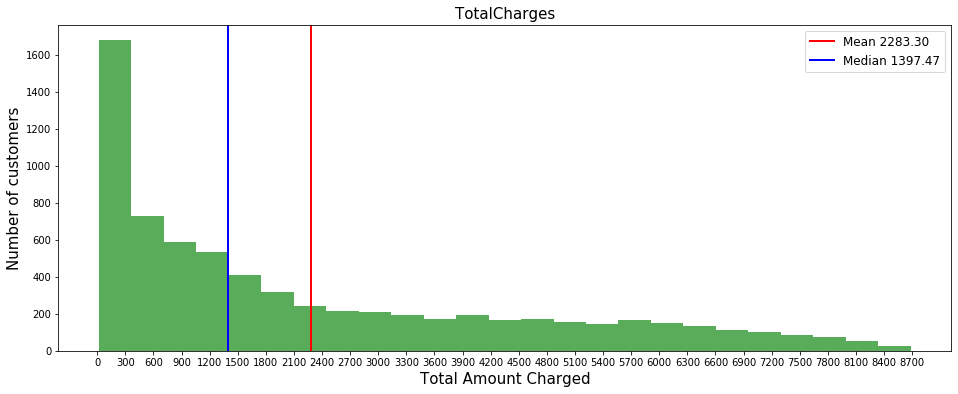

In [13]:
plt.figure(figsize = (16,6))
tc_mean = np.mean(data2['TotalCharges'])
tc_med = np.median(data2['TotalCharges'])
_ = plt.hist(data2['TotalCharges'], bins = 25, alpha = 0.65, color = 'green')
_ = plt.title('TotalCharges', fontsize = 15)
_ = plt.ylabel("Number of customers", fontsize = 15)
_ = plt.xlabel("Total Amount Charged", fontsize = 15)
_ = plt.xticks(np.arange(0, 8800, step=300))
_ = plt.axvline(tc_mean, color='red', linestyle='solid', linewidth=2, label = "Mean %.2f" % tc_mean)
_ = plt.axvline(tc_med, color='blue', linestyle='solid', linewidth=2, label = "Median %.2f" % tc_med)
_ = plt.legend(fontsize = 12)

In [14]:
print("Percentage of customers with TotalCharges less than $300? : %.2f%%" % ((len(data2[data2['TotalCharges'] < 300])) / len(data2['TotalCharges']) * 100))

Percentage of customers with TotalCharges less than $300? : 21.33%


We had to stretch out this histogram in order to get a better look, but we see that **21.33%** of the customers had **TotalCharges** less than **\$300**.

With the visuals above we can gather that:
* Getting these customers to stay for even just 6 months is a major problem. This accounts for **19.34%** of customers in the dataset.
* The minimum amount a customer can pay per month is **\\$18.25** and **19.94%** of customers are paying no more than **\\$6.75** of that minimum amount. 
* About 1/5th of the customers in this data set have only been charged less than **\\$300** total, which makes sense when we consider the previous two points.

Something else we should look into are the columns that have a relationship with **InternetService**. For columns **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV**, **StreamingMovies** the responses are: 'Yes', 'No', and 'No internet service'. We should make sure that if a customer has no internet service they also have a response for the above columns of 'No internet service'. If this is the case across the board, we can change these columns to binary variables with responses of simply 'Yes' or 'No'.

*This is technically a data preprocessing step, but thats okay, we can do it here. More on data preprocessing later.*

In [15]:
no_www = data2[data2.InternetService == 'No'] # Subset customers that have no internet service

In [16]:
# Check for unique values in the given columns. Should only print 'No internet service' to confirm our assumption.
print(no_www['OnlineSecurity'].unique())
print(no_www['OnlineBackup'].unique())
print(no_www['DeviceProtection'].unique())
print(no_www['TechSupport'].unique())
print(no_www['StreamingTV'].unique())
print(no_www['StreamingMovies'].unique())

['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']


Confirmed! So, for the above columns/variables, we'll convert to binary. Which, in this case, simply means that we are removing a 3rd response option, leaving us with only 'Yes' or 'No'.

In [17]:
# Create a list for looping through the dataframe and converting to binary
binaries = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [18]:
# Loop and replace
for i in binaries:
    data2[i] = data2[i].replace({'No internet service' : 'No'})

Next, we'll just do a bit more data manipulation by keeping consistency with the rest of our variables.

In [19]:
data2["SeniorCitizen"] = data2["SeniorCitizen"].replace({1:"Yes",0:"No"})

Let's take a look at the breakdown of customer churning.

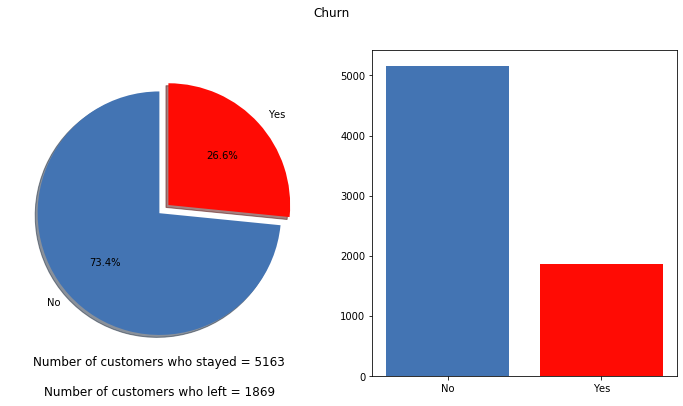

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)

ax1.pie(data2['Churn'].value_counts(), explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90, labels=data2['Churn'].unique(), colors=col_scheme)
fig.set_facecolor('white')

ax2.bar(data2['Churn'].unique(), data2['Churn'].value_counts(), color=col_scheme)
ax1.text(0.5, 0.0, "Number of customers who stayed = %d" % len(data2[data2['Churn'] == 'No']), size=12, ha="center", 
         transform=ax1.transAxes)
ax1.text(0.5,-0.1, "Number of customers who left = %d" % len(data2[data2['Churn'] == 'Yes']), size=12, ha="center", 
         transform=ax1.transAxes)

plt.suptitle('Churn')
plt.show()

Now let's look at customer churning against the different variables.

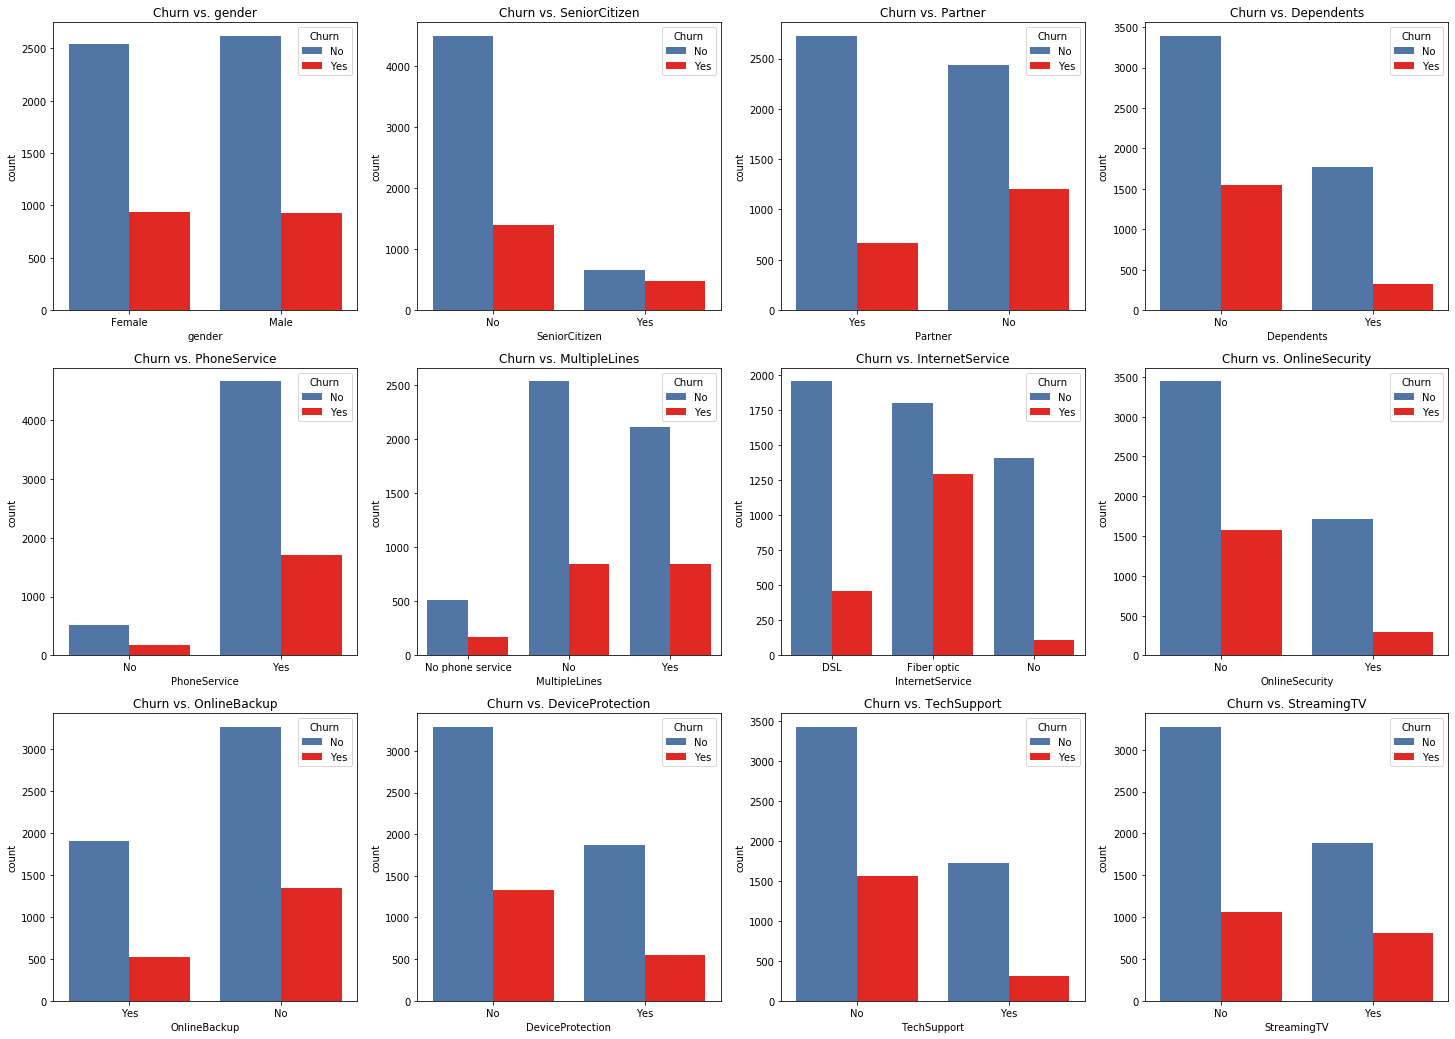

In [21]:
sns.set_palette(sns.color_palette(col_scheme))
fig, ax =plt.subplots(3,4,figsize=(25,18))

sns.countplot('gender', hue='Churn', data=data2, ax=ax[0,0])
ax[0,0].set_title('Churn vs. gender')
sns.countplot('SeniorCitizen', hue='Churn', data=data2, ax=ax[0,1])
ax[0,1].set_title('Churn vs. SeniorCitizen')
sns.countplot('Partner', hue='Churn', data=data2, ax=ax[0,2])
ax[0,2].set_title('Churn vs. Partner')
sns.countplot('Dependents', hue='Churn', data=data2, ax=ax[0,3])
ax[0,3].set_title('Churn vs. Dependents')

sns.countplot('PhoneService', hue='Churn', data=data2, ax=ax[1,0])
ax[1,0].set_title('Churn vs. PhoneService')
sns.countplot('MultipleLines', hue='Churn', data=data2, ax=ax[1,1])
ax[1,1].set_title('Churn vs. MultipleLines')
sns.countplot('InternetService', hue='Churn', data=data2, ax=ax[1,2])
ax[1,2].set_title('Churn vs. InternetService')
sns.countplot('OnlineSecurity', hue='Churn', data=data2, ax=ax[1,3])
ax[1,3].set_title('Churn vs. OnlineSecurity')

sns.countplot('OnlineBackup', hue='Churn', data=data2, ax=ax[2,0])
ax[2,0].set_title('Churn vs. OnlineBackup')
sns.countplot('DeviceProtection', hue='Churn', data=data2, ax=ax[2,1])
ax[2,1].set_title('Churn vs. DeviceProtection')
sns.countplot('TechSupport', hue='Churn', data=data2, ax=ax[2,2])
ax[2,2].set_title('Churn vs. TechSupport')
sns.countplot('StreamingTV', hue='Churn', data=data2, ax=ax[2,3])
ax[2,3].set_title('Churn vs. StreamingTV')

plt.show()

Only a few things of note from these graphs above:
* Senior Citizen customers luckily make up a small portion of the business because almost as many left as stayed.
* The amount of customers with a partner versus with no partner is fairly even. But if we look at customers who don't have a partner and left the company, the amount is almost double those with a partner who left.
* There are less customers using Fiber Optic **InternetService** than there are using DSL service. However, the amount of customers who left the company and had Fiber Optic **InternetService** versus the amount who left and had DSL is nearly double.
* There seems to be a significant proportional difference in the Churn vs. StreamingTV graph

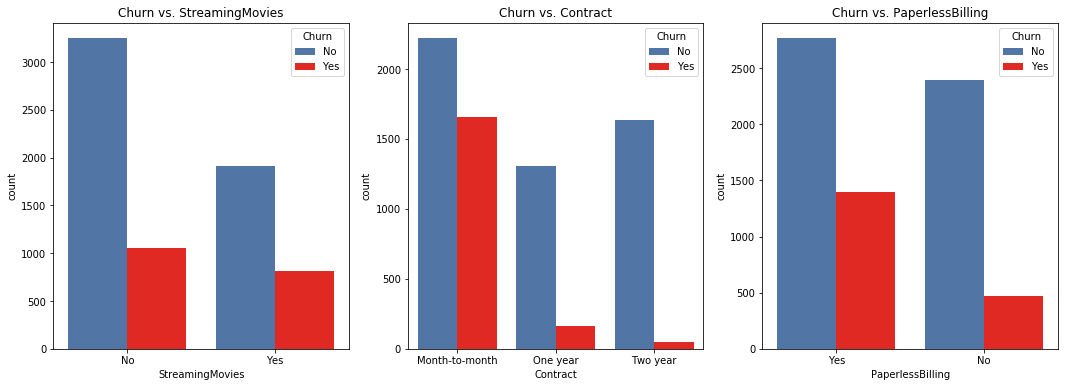

In [22]:
fig, ax = plt.subplots(1,3,figsize=(18,6))

sns.countplot('StreamingMovies', hue='Churn', data=data2, ax=ax[0])
ax[0].set_title('Churn vs. StreamingMovies')
sns.countplot('Contract', hue='Churn', data=data2, ax=ax[1])
ax[1].set_title('Churn vs. Contract')
sns.countplot('PaperlessBilling', hue='Churn', data=data2, ax=ax[2])
ax[2].set_title('Churn vs. PaperlessBilling')

plt.show()

Two things stand out from these three graphs above:
* Look at all those Month-to-month customers who leave the company in the Churn vs. Contract graph! 
* Customers with paperless billing left at a much higher frequency than customers who recieve paper copies of their bill.

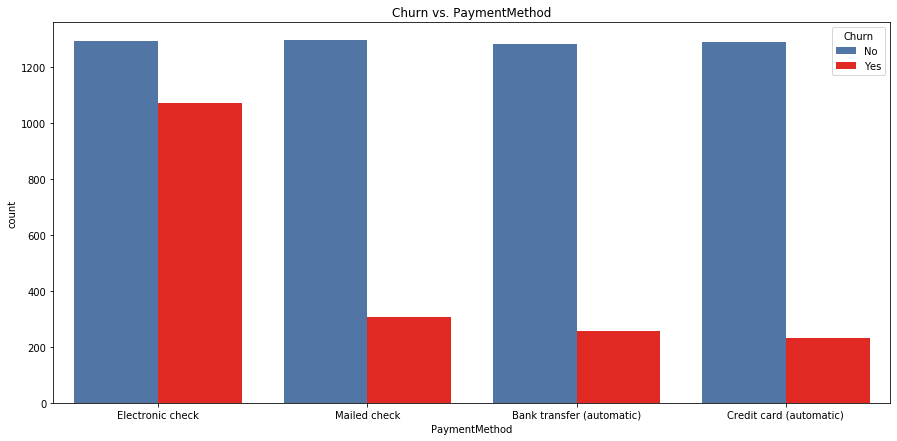

In [23]:
plt.figure(figsize=(15,7))
sns.countplot('PaymentMethod', hue='Churn', data=data2).set_title('Churn vs. PaymentMethod')

plt.show()

This is interesting: when it comes to payment methods, the amount of customers who paid by electronic check and churned is almost 4 times any other method of payment. The raw numbers are below.

In [24]:
pay_meth = pd.DataFrame(data2.groupby(['PaymentMethod', 'Churn'])['Churn'].count())
pay_meth

Churn
PaymentMethod             Churn       
Bank transfer (automatic) No      1284
                          Yes      258
Credit card (automatic)   No      1289
                          Yes      232
Electronic check          No      1294
                          Yes     1071
Mailed check              No      1296
                          Yes      308

## IV. Data Preprocessing

#### More libraries:

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

The goal in this section, Data Preprocessing, is to get our data ready for modeling. In this project we will do that in three ways:
1. I mentioned earlier about converting some of the columns to binary variables (**OnlineSecurity**, **TechSupport**, **StreamingTV**, etc.). To reiterate, a binary variable is a variable with only 2 responses, for example: Yes/No, True/False. For our purposes, we will take all of our binary variables that have Yes/No respones, and convert the responses to 1 for Yes and 0 for No using ```LabelEncoder()```.

2. In addition to encoding the binary variables, we will also be creating dummy variables using ```get_dummies()``` from ```pandas```. This will create new columns in reference to columns with multiple responses. To demonstrate, Contract will get binary columns for each response: Contract_Month-to-month : Yes or No, Contract_One year : Yes or No, etc. and of course, Yes or No will be represneted by 1 or 0.

3. We will then take our continuous variables (**tenure**, **MonthlyCharges**, **TotalCharges**) and scale them using standardization. There is plenty to read on the internet about [Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling). Here is the short version: each value in a column is subtracted by the mean of the column, that number is then divided by the standard deviation of the column, that value now replaces the original value and the end result is that the new mean of the column is 0 and the new standard deviation is 1. 

**IMPORTANT TO NOTE:** While scaling is a data preprocessing task, we will save scaling for use in the **Support Vector Machine**.

In [26]:
# Create a list of binary variables
binaries = list(data2.nunique()[data2.nunique() == 2].keys())

In [27]:
# Create a list of continuous variable and exclude customerID
continuous = list(data2.nunique()[data2.nunique() > 4].keys())
cus_ID = ['customerID']
continuous = [i for i in continuous if i not in cus_ID]

In [28]:
# Create list of categorical data with more than 2 responses. Also, make sure 'Churn' and 'customerID' don't get included
targ_var = ['Churn']
multi = [i for i in data2.columns if i not in continuous + binaries + targ_var + cus_ID]

In [29]:
# Convert all Yes responses to 1, and all No responses to 0.
le = LabelEncoder()
for i in binaries:
    data2[i] = le.fit_transform(data2[i])

In [30]:
# Create dummy variable columns for categorical data with more than 2 responses
data2 = pd.get_dummies(data = data2, columns = multi)

In [31]:
# Make a shallow copy (so we don't affect the final version of the dataset)
df_cop = data2.copy()

## V. Modeling

#### And even more libraries:

In [32]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
import pydotplus
from IPython.display import Image


# This is a work-around for the normal process of adding a path for GraphViz. Thanks to Sarunas on stackoverflow.
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

C:\Users\Gar\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## V.i Random Forest

First, we're going to split the data into a training and testing set. The training set will consist of 75% of the data, leaving 25% to testing. We're also going to use a **random state** which allows us to reproduce this model should we ever need or want to.

In [33]:
train, test = train_test_split(data2, test_size = .25, random_state = 2020)

In [34]:
cols = [i for i in data2.columns if i not in cus_ID + targ_var]

In [35]:
X_train = train[cols]
y_train = train[targ_var]
X_test = test[cols]
y_test = test[targ_var]

Then, we build and run the model. We are going to implement **RandomizedSearchCV** to help us tune our model so we are using the best parameters from a list of different parameters we would like to train on.

In [36]:
# Outline parameters to test
rando_rf_params = {
    'n_estimators': [300, 500, 800],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_features' : [5,6,7,8,9],
    'max_depth' : [5,6,7,8,9]
}

In [37]:
rfmodel = RandomForestClassifier()
rando_rf = RandomizedSearchCV(rfmodel, param_distributions=rando_rf_params, scoring='accuracy', cv=8, n_jobs=-1, random_state=2020)
rando_rf.fit(X_train, y_train.values.ravel())
best_params_rf = rando_rf.best_params_
print(best_params_rf)

{'n_estimators': 800, 'max_features': 6, 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True}


In [38]:
ypred_rf = rando_rf.predict(X_test)
rf_pred_score = np.around(rando_rf.score(X_test, y_test), decimals=4)

In [39]:
print('Error rate = %.2f%%' % ((1 - rf_pred_score) * 100))

Error rate = 18.71%


So, after we run and score the model, we are getting an error rate of **18.71%**. In other words, **81.29%** of the time we are able to correctly predict whether a customer is going to **Churn**, and **18.71%** of the time we are incorrect in our prediction. Let's investigate further.

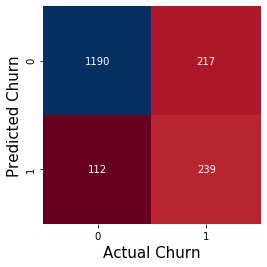

Total predictions = 1758


In [40]:
mat = confusion_matrix(y_test, ypred_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(y_test))

The plot above is called a confusion matrix. The X axis is the actual value from the data set, the y axis is the predicted value. Here is what the confusion matrix tells us:
* The model predicted that 1407 customers **would not** churn. Of those predictions, the model was correct **84.58%** of the time.
* The model predicted that 351 customer **would** churn. Of those predictions, the model was correct **68.09%** of the time.

The model does fairly well in predicting that customers will stay, but no so much in predicting that a customer will leave.

Next, we'll look at which features the model considered most important for making its predictions.

In [41]:
rf_importances = pd.DataFrame(rando_rf.best_estimator_.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
top_6 = rf_importances[rf_importances['Importance'] > .06]
rf_importances

,Importance
Contract_Month-to-month,0.170555
tenure,0.150882
TotalCharges,0.116423
Contract_Two year,0.103530
MonthlyCharges,0.092636
InternetService_Fiber optic,0.086391
PaymentMethod_Electronic check,0.046236
InternetService_No,0.034289
Contract_One year,0.028872
InternetService_DSL,0.021731


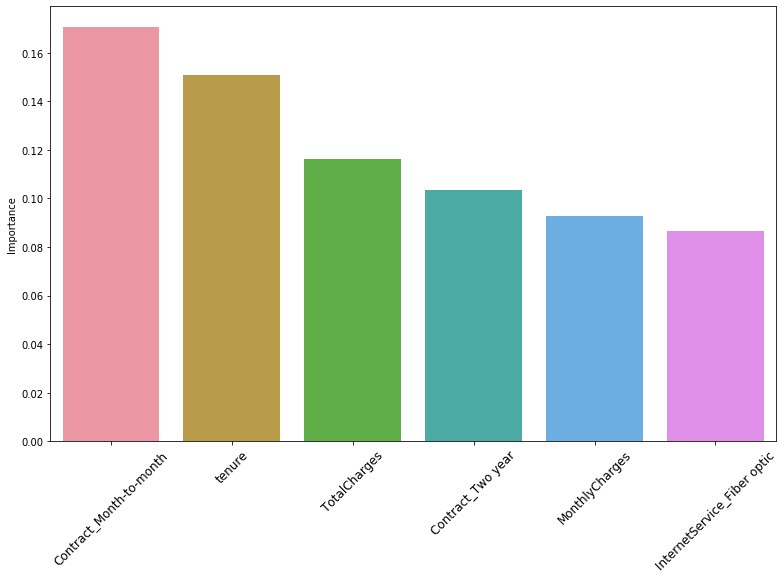

In [42]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top_6.index, top_6['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

The barplot above tells us that the most important feature in making predictions is **Contract_Month-to-month**, followed by **tenure**, **TotalCharges**, **Contract_Two year**, **MonthlyCharges**, and **InternetService_Fiber optic**, respectively.

## V.ii Decision Tree Classifier

Now lets play with Decision Tree Classifiers and see if we get any better performance.

*Using* ```RandomizedSearchCV()``` *makes for diffuculty visualizing a Decision Tree. We've already seen how* ```RandomizedSearchCV()``` *can work for Random Forest. For this part, we won't use it directly. We'll use RandomizedSearchCV to figure out which parameters to use, and then we'll plug those parameters into the* ```DecisionTreeClassifier()``` *class.*

In [43]:
# Outline parameters to test
rando_dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : [4,5,6],
    'max_depth' : [3,4,5]
}

In [44]:
dtmod = DecisionTreeClassifier()
rando_dt = RandomizedSearchCV(dtmod, param_distributions=rando_dt_params, scoring='accuracy', cv=8, n_jobs=-1, random_state=2020)
rando_dt.fit(X_train, y_train.values.ravel())
best_params_dt = rando_dt.best_params_
print(best_params_dt)

{'splitter': 'best', 'max_features': 5, 'max_depth': 5, 'criterion': 'gini'}


In order to avoid the complexity and length of coding it takes to display a Decision Tree created through ```RandomizedSearchCV```, we are going to take these parameters and re-enter them into ```DecisionTreeClassifier()```.
#### **IMPORTANT NOTE**: The line above displays the best parameters suggested for the model. For the sake of the Decision Tree visualization, we are going to use ```3``` for ```max_depth```. However, for your sake, with ```max_depth=5```, the model had an error rate of **20.19%** (correct predictions **79.81%** of the time).

In [45]:
dtmod = DecisionTreeClassifier(splitter='best', max_features=6, max_depth=3, criterion='gini', random_state=2020)
dtmod.fit(X_train, y_train)
ypred_dt = dtmod.predict(X_test)
dtmod_pred_score = np.around(dtmod.score(X_test, y_test), decimals=4)

In [46]:
print('Error rate = %.2f%%' % ((1 - dtmod_pred_score) * 100))

Error rate = 20.42%


The Decision Tree Model performed just a slight bit worse than Random Forest by **1.71%**. 

Also, another **IMPORTANT NOTE**: Originally I said we would use ```3``` for ```max_depth```. We did, but I didn't mention using ```max_features=6```. I used ```6``` instead of ```5``` because using ```5``` produced an error rate above **25%**! It is important to note (sorry, not bolding this time) that any slight change in parameter tuning can have different effects, independent of another parameter. I'll try to illustrate this as best as possible: 
* For any given dataset, when ```max_features=5``` the best choice for ```max_depth``` might be ```6```. But that doesn't mean if you change ```max_features``` to ```3``` that ```max_depth=6``` is still the best choice. If ```max_features=3```, now ```max_depth=10``` might be a better choice. The only way to know is to test different parameters.

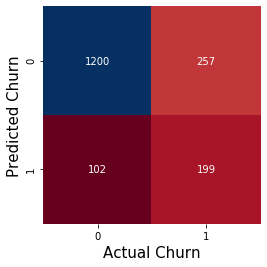

Total predictions = 1758


In [47]:
mat = confusion_matrix(y_test, ypred_dt)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(y_test))

From the confusion matrix we learn:
* The model predicted that 1457 customers **would not** churn. Of those predictions, the model was correct **82.36%** of the time.
* The model predicted that 301 customer **would** churn. Of those predictions, the model was correct **66.11%** of the time.

Similar results to the Random Forest confusion matrix: better at predicting when customers won't churn than will churn.

Next, the most important features.

In [48]:
dt_importances = pd.DataFrame(dtmod.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
top_5 = dt_importances[dt_importances['Importance'] > .01]
dt_importances

,Importance
InternetService_Fiber optic,0.455141
tenure,0.374415
TechSupport,0.114537
InternetService_No,0.041075
PaperlessBilling,0.010777
Partner,0.004054
gender,0.000000
MultipleLines_No phone service,0.000000
PaymentMethod_Electronic check,0.000000
PaymentMethod_Credit card (automatic),0.000000


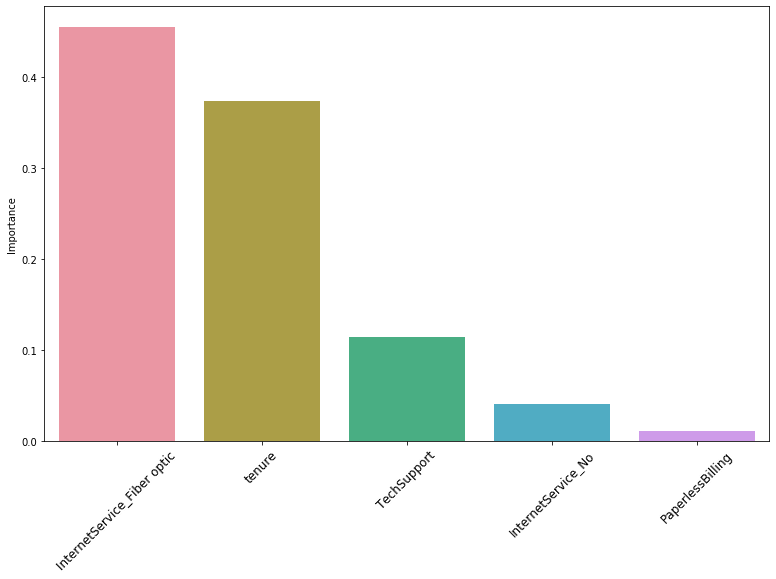

In [49]:
plt.figure(figsize=(13,8))
ax = sns.barplot(top_5.index, top_5['Importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.show()

The **Decision Tree** model says that **InternetService_Fiber optic** was most important in making its predictions, followed by **tenure**. Then, there is a significant drop in importance.

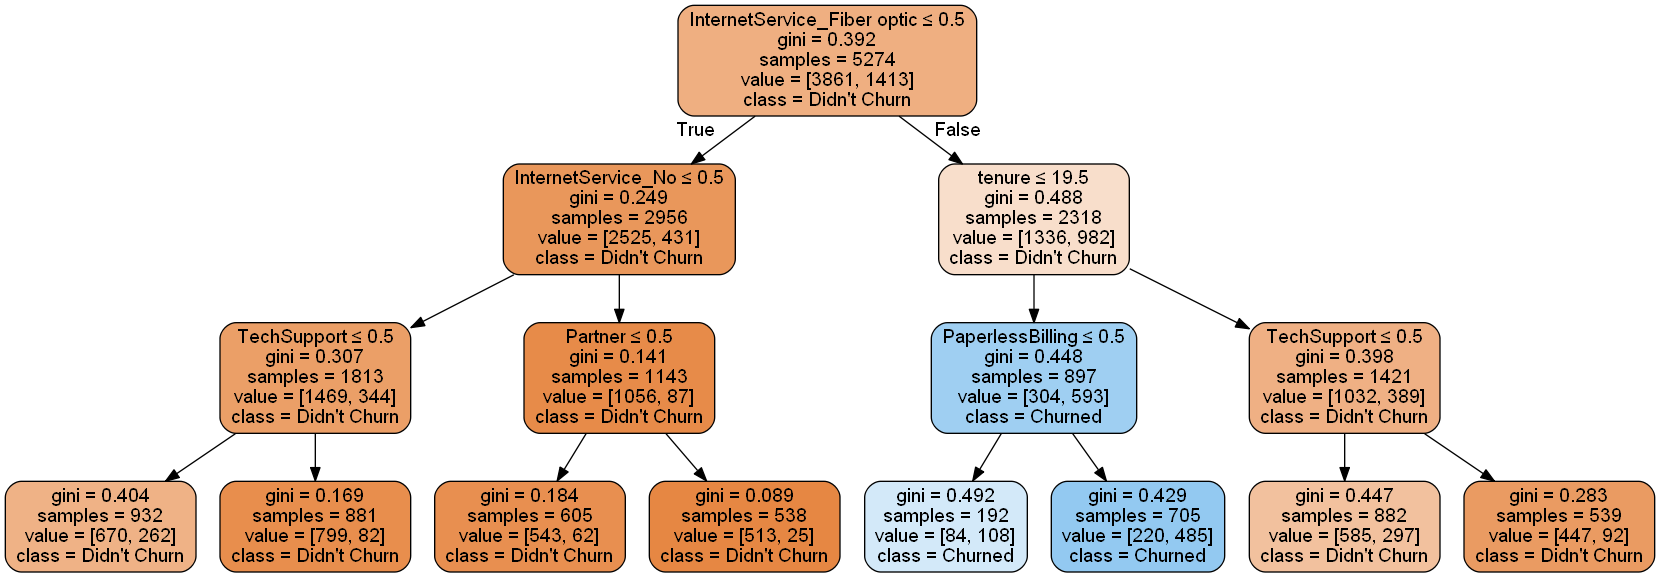

In [50]:
dot_data = StringIO()
tree.export_graphviz(dtmod, 
 out_file=dot_data, class_names=["Didn't Churn", "Churned"],
 feature_names=list(X_train.columns), # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

Let's interpret the tree. At the top we have the root node **InternetService_Fiber optic**. At the root, the model says that if a customer doesn't have fiber optic internet service (as indicated by a 0 in the dummy variable **InternetService_Fiber optic**) we can assume the customer did **not Churn**. If a customer doesn't have fiber optic internet service, but their **tenure** is 19 months or less, we can assume that customer also did **not Churn**. However, if a customer has fiber optic internet service, they've been with the company for 19 months or less, and they don't have **PaperlessBilling**, the model says we can classify that customer as a customer who will **Churn**.

That's enough for tree based methods.

## V.iii Support Vector Machine (Classifier)

We're going to use a **Support Vector Machine** (SVM) now which means we need scale the data.

In [51]:
# Standardize the continuous variable data
std = StandardScaler()
scaled = std.fit_transform(data2[continuous])
scaled = pd.DataFrame(scaled, columns=continuous)

In [52]:
# Another copy
new_copy = data2.copy()

# Drop the columns we won't be using
data2 = data2.drop(columns = continuous, axis = 1)

# Merge in our standardized data
data2 = data2.merge(scaled, left_index=True, right_index=True, how = "left")

In [53]:
# Reassess training and testing data
train, test = train_test_split(data2, test_size = .25, random_state = 2020)
cols_svc = [i for i in data2.columns if i not in cus_ID + targ_var]
X_train_svc = train[cols_svc]
y_train_svc = train[targ_var]
X_test_svc = test[cols_svc]
y_test_svc = test[targ_var]

With that extra bit of data preprocessing done, we can build and run the SVM.

In [54]:
svcmod = SVC(kernel='poly', degree=2, gamma='auto', random_state=2020)
svcmod.fit(X_train_svc, y_train_svc.values.ravel())
ypred_svc = svcmod.predict(X_test_svc)
svcmod_pred_score = np.around(svcmod.score(X_test_svc, y_test_svc), decimals=4)

**NOTE**: Because we used ```kernel='poly'```, we aren't going to be able to get a breakdown of feature importances. Which isn't an issue, we already have a pretty good idea on which features are most important.

In [55]:
print('Error rate = %.2f%%' % ((1 - svcmod_pred_score) * 100))

Error rate = 19.11%


The **SVM** worked better than the **Decision Tree**, but just a smidge worse than **Random Forest**. At a **19.11%** error rate, the **SVM** is making correct predictions **80.89%** of the time.

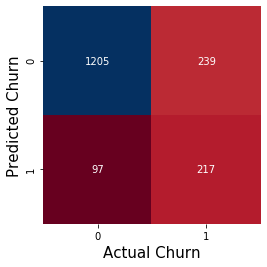

Total predictions = 1758


In [56]:
mat = confusion_matrix(y_test_svc, ypred_svc)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='RdBu')
plt.xlabel('Actual Churn', size=15)
plt.ylabel('Predicted Churn', size=15)
plt.show()
print('Total predictions = %d' % len(y_test_svc))

From the **SVM** confusion matrix we learn:
* The model predicted that 1444 customers **would not** churn. Of those predictions, the model was correct **83.45%** of the time.
* The model predicted that 314 customer **would** churn. Of those predictions, the model was correct **69.11%** of the time.

Similar results to the Random Forest and Decision Tree confusion matrices: better at predicting when customers won't churn than will churn. Although ever so slightly, specifically when predicting a customer will churn, **SVM** performed the best.

## VI. Conclusions

Let's wrap it all up/summarize and make some conclusions. We can use all this information to raise some more questions as well.

In [62]:
# Create DataFrames out of the classifation reports for each model
rf_report = pd.DataFrame(classification_report(y_test, ypred_rf, output_dict=True)).transpose()
dt_report = pd.DataFrame(classification_report(y_test, ypred_dt, output_dict=True)).transpose()
svc_report = pd.DataFrame(classification_report(y_test_svc, ypred_svc, output_dict=True)).transpose()

# Put the reports into a list for iteration
result_dfs = [rf_report, dt_report, svc_report]

# Construt empty DataFrame
results = pd.DataFrame([])

# Loop through the results list of DataFrames
for i in result_dfs:
    
    # Append only the 'weighted avg' row to a new DataFrame
    results = results.append(pd.DataFrame(i.loc['weighted avg']).transpose())
    
# Change index names to reflect there specific results
results = results.reset_index(drop=True)
results = results.rename(index={0 : 'Random Forest', 1 : 'Decision Tree',
                               2 : 'Support Vector Machine'})
results.index.name = 'Model'
results = results.reset_index()

# Remove 'support' column
del results['support']

If you need a crash course on Recall, Precision, and F1-Score you can follow this [link](https://pathmind.com/wiki/accuracy-precision-recall-f1) to a great explanation. The short version:
* Use precision when the cost of a false positive is high.
* Use recall when the cost of a false negative is high.
* F1-Score is a way to find a happy medium.

*We are using weighted scores*

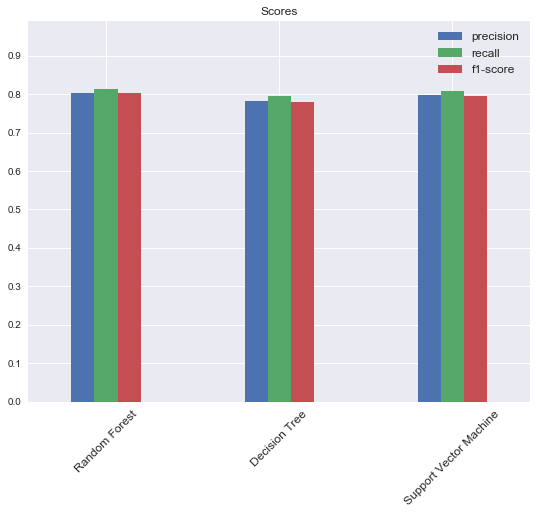

,Model,precision,recall,f1-score
0,Random Forest,0.803009,0.812856,0.804308
1,Decision Tree,0.781465,0.795791,0.780620
2,Support Vector Machine,0.797290,0.808874,0.796192


In [63]:
plt.style.use('seaborn')
ax = results.plot(x='Model', y=['precision', 'recall', 'f1-score'], kind="bar", 
             width=.4, ylim=(0,.99), figsize=(9,7), title='Scores')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=12)
plt.yticks(np.arange(0, 1, step=0.1))
ax.set_xlabel("")
plt.legend(prop={'size': 12}, loc=1)
plt.show()

results

In [64]:
print('Random Forest error rate = %.2f%%' % ((1 - rf_pred_score) * 100))
print('Decision Tree error rate = %.2f%%' % ((1 - dtmod_pred_score) * 100))
print('Support Vector Machine error rate = %.2f%%' % ((1 - svcmod_pred_score) * 100))

Random Forest error rate = 18.71%
Decision Tree error rate = 20.42%
Support Vector Machine error rate = 19.11%


In comparing the two models that allowed us to view feature importances (Decision Tree and Random Forest), we find that our most important features are: **Contract**, **tenure**, **TotalCharges**, **MonthlyCharges**, and **InternetService**. Decision Tree displayed use from **TechSupport** and **PaperlessBilling**, but the contributions of these variables seemed less significant.

We can see that Random Forest (our strongest model) suggested that **Month-to-month** contracts and **tenure** were its two most important features in making predictions. Additionally, Decision Tree considered **tenure** as its second most important feature. And finally, when we consider the Exploratory Data Analysis we did, it is clear that this company has some issue with their **Month-to-month** customers. What kind of incentives can this company offer to customers to get them to sign **One-year** or **Two-year** contracts? What adjustments can be made to **Month-to-Month** contracts that would be more favorable to customers, without taking away the appeal of a **One-year** or **Two-year** contract?

**InternetService** was another important factor in making predictions, specifically, **Fiber optic internet service**. We are not privy to the historical timing of this data, but it is a major problem that more people with **fiber optic internet service** are leaving than with **DSL internet service**. With fiber optics being the newer technology, maybe it’s possible that the company was still working out some kinks? Regardless, if the newer (and supposed to be more efficient) technology is causing people to run from your company, you have a problem. Further, more in-depth, research is needed to fully understand this **InternetService** issue, but at the least we now know that it is an area to focus on.

As far as model performance, Random Forest performed best, having the highest scores in every scoring category (although not by much). Second place goes to the Support Vector Machine, and Decision Tree last. Every model performed decent enough when predicting a customer would stay, and poorly when predicting a customer would leave. This is likely because only about a quarter of our data contains customers who **Churned**, so predicting that class will take a hit. The Support Vector Machine was most accurate in predicting that a customer would leave, but only by a small percentage (probably insignificant).

We were able to learn a lot from the project: how long customers are staying with the company, which features are most likely to contribute to customers leaving, and we have 3 different models to test for predicting customer churning. Most importantly, we've raised concerns that allow for some questions to be answered, for further investigation to be completed, and for more information to be gathered. We now have targets to focus in on and conduct a new study in the future.